# Personalización del entrenamiento --- Ejemplo 2

* 30:00 min | Última modificación: Mayo 12, 2021 | [YouTube]

Adaptado de:

* https://www.tensorflow.org/tutorials/keras/keras_tuner

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

'2.4.1'

## Carga de datos

In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv -O /tmp/iris_training.csv

--2021-05-13 15:25:44--  https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.80, 142.250.78.112, 142.250.78.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2194 (2.1K) [text/csv]
Saving to: ‘/tmp/iris_training.csv’

/tmp/iris_training. 100%[===================>]   2.14K  --.-KB/s    in 0s      

2021-05-13 15:25:44 (6.57 MB/s) - ‘/tmp/iris_training.csv’ saved [2194/2194]



In [3]:
#
# Primeras lineas del archivo
#
!head -n5 /tmp/iris_training.csv

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
#
# Nombres de las columnas del archivo
#
column_names = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species",
]

#
# Extrae los nombres de las características
#
feature_names = column_names[:-1]

#
# Extrae el nombre de la clase
#
label_name = column_names[-1]

#
# Nombres de las clases
#
class_names = [
    "Iris setosa",
    "Iris versicolor",
    "Iris virginica",
]

feature_names, label_name

(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 'species')

## Creación de un `tf.data.Dataset`

In [5]:
BATCH_SIZE = 32

#
# Crea un dataset de TensorFlow a partir
# del archivo CSV.
# Crea pares (features, label)
#
train_dataset = tf.data.experimental.make_csv_dataset(
    "/tmp/iris_training.csv",
    BATCH_SIZE,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
)

features, labels = next(iter(train_dataset))

#
# Note que features es un es OrderedDict por
# columnas
#
features, labels

(OrderedDict([('sepal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([6.1, 5.4, 4.6, 6.3, 5.7, 5.7, 6.7, 6.5, 5.4, 5.4, 6.5, 4.9, 5.1,
                      6.3, 4.6, 4.8, 6.6, 5.8, 6.8, 5.4, 7.2, 4.6, 5.8, 4.8, 5.7, 6.4,
                      6.3, 4.8, 5.5, 7.7, 4.7, 5. ], dtype=float32)>),
              ('sepal_width',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([2.6, 3. , 3.6, 3.3, 2.9, 3. , 3. , 3. , 3.9, 3.4, 3. , 2.5, 3.5,
                      3.4, 3.1, 3. , 3. , 2.7, 3.2, 3.9, 3.6, 3.4, 2.8, 3.1, 2.8, 3.2,
                      2.7, 3. , 3.5, 3. , 3.2, 3.3], dtype=float32)>),
              ('petal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([5.6, 4.5, 1. , 6. , 4.2, 4.2, 5.2, 5.8, 1.7, 1.5, 5.2, 4.5, 1.4,
                      5.6, 1.5, 1.4, 4.4, 4.1, 5.9, 1.3, 6.1, 1.4, 5.1, 1.6, 4.1, 5.3,
                      4.9, 1.4, 1.3, 6.1, 1.6, 1.4], dtype

In [6]:
#
# El dataset es un objeto iterable
#
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.2, 5.2, 6.7, 5.7, 6. , 5.7, 5.6, 5.5, 6.1, 7.7, 4.9, 5.6, 5.7,
       4.8, 5. , 5.8, 4.9, 6.9, 7. , 6.2, 4.6, 4.9, 6.5, 6.3, 5.4, 6.8,
       5.1, 6.7, 7.2, 5. , 6.3, 5.1], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.7, 3.5, 3.1, 3. , 3. , 4.4, 2.7, 2.4, 3. , 2.6, 3.1, 2.9, 2.8,
       3. , 3. , 4. , 2.5, 3.1, 3.2, 3.4, 3.2, 3.1, 3. , 3.3, 3.7, 2.8,
       3.7, 3.3, 3.6, 3.4, 3.3, 2.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.9, 1.5, 5.6, 4.2, 4.8, 1.5, 4.2, 3.8, 4.9, 6.9, 1.5, 3.6, 4.1,
       1.4, 1.6, 1.2, 4.5, 5.1, 4.7, 5.4, 1.4, 1.5, 5.2, 4.7, 1.5, 4.8,
       1.5, 5.7, 6.1, 1.5, 6. , 3. ], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.4, 0.2, 2.4, 1.2, 1.8, 0.4, 1.3, 1.1, 1.8, 2.3, 0.1, 1.3, 1.3,
       0.1, 0.2, 0.2, 1.7, 2.3, 1.4, 2.3, 0.2, 0.1, 2. , 1.6,

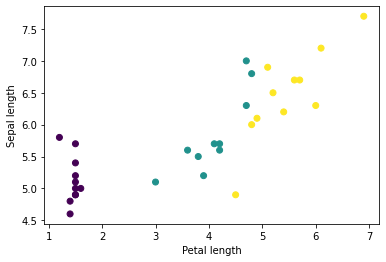

In [7]:
#
# Gráfico de algunos datos por clase
# 
plt.scatter(
    features["petal_length"],
    features["sepal_length"],
    c=labels,
    cmap="viridis",
)

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [8]:
#
# Se empaquetan los datos que estan en un array
# del diccionario en patrones mediante tf.stack
#
def pack_features(features, labels):
    features = tf.stack(
        list(features.values()),
        axis=1,
    )
    return features, labels


#
# empaqueta el dataset
#
train_dataset = train_dataset.map(pack_features)

#
# Ejemplo de los datos empaquetados
#
features, labels = next(iter(train_dataset))
features[:5], labels[:5]

(<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[7.3, 2.9, 6.3, 1.8],
        [5.9, 3.2, 4.8, 1.8],
        [7.7, 2.8, 6.7, 2. ],
        [6.1, 2.8, 4. , 1.3],
        [4.6, 3.6, 1. , 0.2]], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([2, 1, 2, 1, 0], dtype=int32)>)

## Creación del modelo

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            10,
            activation=tf.nn.relu,
            input_shape=(4,),
        ),
        tf.keras.layers.Dense(
            10,
            activation=tf.nn.relu,
        ),
        tf.keras.layers.Dense(3),
    ]
)

#
# Aunque el modelo no ha sido entrenado
# si puede producir pronósticos ya que los
# pesos fueron inicialiados
#
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.67180514,  1.32045   ,  1.6190882 ],
       [-0.22123504,  1.1479669 ,  1.5608168 ],
       [-0.8805662 ,  1.3509626 ,  1.6402622 ],
       [-0.13000938,  0.92408264,  0.92524034],
       [ 0.08130485,  1.0553362 ,  0.32561848]], dtype=float32)>

In [10]:
#
# Aplica la transformación softmax a los pronósticos
#
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.05489736, 0.40251014, 0.54259247],
       [0.09196039, 0.36160767, 0.5464319 ],
       [0.04395026, 0.40935695, 0.54669285],
       [0.1483226 , 0.4255922 , 0.4260852 ],
       [0.20303145, 0.53774923, 0.25921935]], dtype=float32)>

In [11]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 1 1 1 2 2 2 1 2 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 2 2]
    Labels: [2 1 2 1 0 0 1 2 2 1 0 1 1 0 1 1 2 2 2 1 2 0 0 0 0 0 0 0 0 1 2 2]


## Función de pérdida

In [12]:
#
# Obtiene una instancia de la función de pérdida
# definida internamente en TensorFlow
#
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#
# Se crea una función para computar la función de
# pérdida. El parámetro training es requerido para 
# capas que tienen una operación diferente durante 
# el entrenamiento y la inferencia.
#
def loss(model, x, y, training):
    #
    # Computa el pronóstico del modelo
    #
    y_ = model(x, training=training)
    
    #
    # Retorna la pérdida
    #
    return loss_fn(y_true=y, y_pred=y_)

#
# Ejemplo del resultado de la función para
# el modelo sin entrenar
#
loss(model, features, labels, training=False)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0924423>

## Monitoreo del gradiente

In [13]:
def grad(model, inputs, targets):
    #
    # Monitoreo
    #
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
        
    #
    # Retorna la pérdida y los gradientes de las variables
    # del modelo
    #
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Creación del optimizador

In [14]:
#
# Crea una instancia del optimizador SGD
#
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

#
# Un paso del optimizador se computa de la siguiente manera:
#
#   1. Se calcula la función de pérdida y los gradientes
#      de los parámetros del modelo
#
loss_value, grads = grad(model, features, labels)

optimizer.iterations.numpy(), loss_value.numpy()

(0, 1.0924423)

In [15]:
#
#   2. Se mejoran los parámetros mediante la corrección de
#      parámetros que implementa el optimizador
#
optimizer.apply_gradients(
    zip(
        grads,
        model.trainable_variables,
    )
)

optimizer.iterations.numpy(), loss(model, features, labels, training=True).numpy()

(1, 1.0596707)

## Proceso iterativo de entrenamiento

In [16]:
#
# historia
#
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):

    #
    # Obtiene instancias de las funciones
    #
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x, y in train_dataset:

        #
        # Computa la pérdida y el gradiente
        #
        loss_value, grads = grad(model, x, y)

        #
        # Mejora los parámetros
        #
        optimizer.apply_gradients(
            zip(
                grads,
                model.trainable_variables,
            )
        )

        #
        # Progreso
        #
        epoch_loss_avg.update_state(
            loss_value,
        )
        
        epoch_accuracy.update_state(
            y,
            model(x, training=True),
        )

    #
    # Almacena la historia
    #
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    #
    # Reporte
    #
    if epoch % 50 == 0:
        print(
            "Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(
                epoch,
                epoch_loss_avg.result(),
                epoch_accuracy.result(),
            )
        )

Epoch 000: Loss: 1.003, Accuracy: 35.833%
Epoch 050: Loss: 0.371, Accuracy: 90.833%
Epoch 100: Loss: 0.243, Accuracy: 96.667%
Epoch 150: Loss: 0.177, Accuracy: 98.333%
Epoch 200: Loss: 0.131, Accuracy: 98.333%


## Graficación de la función de pérdida

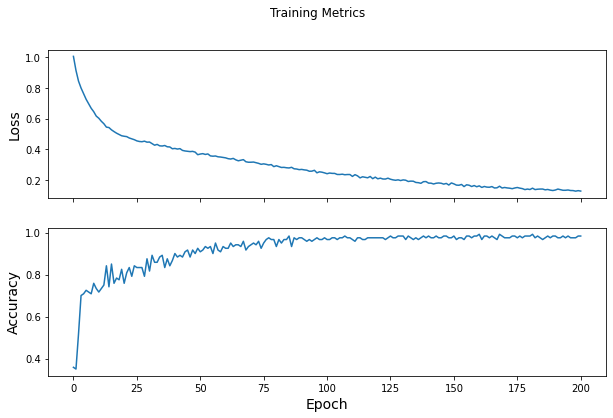

In [17]:
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 6))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## Descarga de los datos para test

In [18]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv -O /tmp/iris_test.csv

--2021-05-13 15:25:57--  https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.80, 142.250.78.112, 142.250.78.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573 [text/csv]
Saving to: ‘/tmp/iris_test.csv’

/tmp/iris_test.csv  100%[===================>]     573  --.-KB/s    in 0s      

2021-05-13 15:25:57 (5.74 MB/s) - ‘/tmp/iris_test.csv’ saved [573/573]



## Creación del dataset y empaquetamiento

In [19]:
test_dataset = tf.data.experimental.make_csv_dataset(
    "/tmp/iris_test.csv",
    BATCH_SIZE,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
)

test_dataset = test_dataset.map(pack_features)

## Evaluación de la precisión del modelo

In [20]:
#
# Crea una instancia de la metrica
#
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    #
    #  training=False para pronóstico.
    #
    logits = model(x, training=False)

    #
    # Obtiene la neurona con la salida más alta
    #
    prediction = tf.argmax(
        logits,
        axis=1,
        output_type=tf.int32,
    )

    #
    # Computa la precisión
    #
    test_accuracy(prediction, y)

test_accuracy.result().numpy()

0.96666664

In [21]:
#
# Resultados para el último batch usado
#
tf.stack([y, prediction], axis=1).numpy()

array([[2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2]], dtype=int32)

## Uso del modelo

In [22]:
#
# La codificación de las clases es la siguiente:
#    * 0: Iris setosa
#    * 1: Iris versicolor
#    * 2: Iris virginica
#
# Se crean tres patrones de prueba
#
predict_dataset = tf.convert_to_tensor(
    [
        [5.1, 3.3, 1.7, 0.5],
        [5.9, 3.0, 4.2, 1.5],
        [6.9, 3.1, 5.4, 2.1],
    ]
)

#
# Cómputo de los pronósticos
#
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
    #
    # Ontiene la clase {0, 1, 2}
    #
    class_idx = tf.argmax(logits).numpy()
    name = class_names[class_idx]
    
    #
    # Normaliza la salida con softmax
    #
    p = tf.nn.softmax(logits)[class_idx]
        
    #
    # Imprime el resultado y su probabilidad
    #
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100 * p))

Example 0 prediction: Iris setosa (97.3%)
Example 1 prediction: Iris versicolor (87.6%)
Example 2 prediction: Iris virginica (79.2%)
